In [1]:
%load_ext autoreload
%matplotlib inline

%autoreload 2

# %load_ext watermark
# %watermark -v -n -m -p numpy,scipy,sklearn,pandas,tensorflow,keras



In [2]:
from data.preprocess import PreProcessor

data = PreProcessor(config=PreProcessor.DEFAULT_CONFIG,
                    data_dir='data/raw/r252-corpus-features/org/elasticsearch/action/')
# data = PreProcessor(config=PreProcessor.DEFAULT_CONFIG,
#                     data_dir='data/raw/r252-corpus-features/org/elasticsearch/')

vocab = data.metadata['token_vocab']
processed = data.get_tensorise_data()


In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras import layers

from models.cnn_attention import ConvAttention
from utils.activations import masked_sparse_cross_entropy_loss

# TODO make the input a json file and parse it
vocabulary_size = len(vocab) + 1
max_chunk_length = data.config['max_chunk_length']
hyperparameter = {'batch_size': 1, 'k1': 8, 'k2': 8, 'w1': 24, 'w2': 29, 'w3': 10, 'dropout_rate': 0,
                  'max_chunk_length': max_chunk_length, 'vocabulary_size': vocabulary_size, 'embedding_dim': 128}

# code_snippet = processed['body_tokens']
code_snippet = np.expand_dims(processed['body_tokens'], axis=-1)
label_name = np.expand_dims(processed['name_tokens'], axis=-1)
# dataset = tf.data.Dataset.from_tensor_slices((code_snippet, label_name))
# dataset = dataset.shuffle(1000).batch(hyperparameter['batch_size'], drop_remainder=True).repeat()

# label_name = processed['name_tokens']
# label_name = keras.utils.to_categorical(processed['name_tokens'], num_classes=vocabulary_size)
print("Vocab Size: {} number of Code snippet: {} number of labels: {}".format(vocabulary_size, len(code_snippet),
                                                                              len(label_name)))
print("Label_name shape: {}\nCode_snippet shape: {}".format(label_name.shape, code_snippet.shape))

# Optimised hyperparameter are reported in page 5 of the paper

batch_size = hyperparameter['batch_size']
# define layers
main_input = layers.Input(shape=(max_chunk_length, 1),
                          batch_size=batch_size,
                          dtype=tf.int32, name='main_input',
                          )

cnn_layer = ConvAttention(hyperparameter)

optimizer = keras.optimizers.Nadam()  # RMSprop with Nesterov momentum
# loss_func = masked_sparse_cross_entropy_loss
loss_func = keras.losses.sparse_categorical_crossentropy

# define execution
cnn_output = cnn_layer(main_input)
model = keras.Model(inputs=[main_input], outputs=cnn_output)
model.compile(optimizer=optimizer,
              loss=loss_func,
              metrics=['accuracy'],
              )
# fit the model
# tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True,
#                                          batch_size=batch_size)
history = model.fit(code_snippet,
                    label_name,
                    epochs=35,
                    verbose=2,
                    batch_size=batch_size,
                    # steps_per_epoch=1,
                    # callbacks=[tbCallBack],
                    validation_split=0.2,
                    )


Vocab Size: 1404 number of Code snippet: 1391 number of labels: 1391
Label_name shape: (1391, 50, 1)
Code_snippet shape: (1391, 50, 1)
ConvAttention: mask_vector shape = (1, 50, 1)
ConvAttention: Tokens shape = (1, 50, 1, 128)


ConvAttention: h_t shape = (1, 50, 8)
AttentionFeatures: C shape = (1, 50, 1, 128), h_t shape = (1, 50, 8)
AttentionFeatures: L_1 shape = (1, 50, 1, 8)
AttentionFeatures: L_2 shape = (1, 50, 1, 8)
AttentionFeatures: L_2 shape  after multiply = (1, 50, 50, 8)
AttentionFeatures: L_feat shape = (1, 50, 50, 8)
ConvAttention: L_feat shape = (1, 50, 50, 8)
AttentionWeights: l_feat shape = (1, 50, 50, 8)


AttentionWeights: attention_weight shape = (1, 50, 50, 1)
ConvAttention: alpha shape = (1, 50, 50)
ConvAttention: n_hat shape = (1, 50, 128)
ConvAttention: E shape = (1404, 128)
ConvAttention: n_hat_E shape = (1, 50, 1404)
ConvAttention: n shape = (1, 50, 1404)
Train on 1112 samples, validate on 279 samples


Epoch 1/35


 - 33s - loss: 1.2859 - acc: 0.8584 - val_loss: 0.6509 - val_acc: 0.8968


Epoch 2/35


 - 22s - loss: 0.5803 - acc: 0.9007 - val_loss: 0.6166 - val_acc: 0.8943


Epoch 3/35


 - 22s - loss: 0.5541 - acc: 0.9011 - val_loss: 0.6059 - val_acc: 0.8999


Epoch 4/35


 - 27s - loss: 0.5273 - acc: 0.9039 - val_loss: 0.6086 - val_acc: 0.8961


Epoch 5/35


 - 22s - loss: 0.5025 - acc: 0.9081 - val_loss: 0.6083 - val_acc: 0.9013


Epoch 6/35


 - 22s - loss: 0.5047 - acc: 0.9078 - val_loss: 0.6147 - val_acc: 0.9011


Epoch 7/35


 - 24s - loss: 0.4765 - acc: 0.9105 - val_loss: 0.6116 - val_acc: 0.8999


Epoch 8/35


 - 24s - loss: 0.4367 - acc: 0.9142 - val_loss: 0.5860 - val_acc: 0.9083


Epoch 9/35


 - 22s - loss: 0.3944 - acc: 0.9199 - val_loss: 0.5057 - val_acc: 0.9125


Epoch 10/35


 - 22s - loss: 0.3571 - acc: 0.9252 - val_loss: 0.5302 - val_acc: 0.9153


Epoch 11/35


 - 22s - loss: 0.3339 - acc: 0.9269 - val_loss: 0.5031 - val_acc: 0.9164


Epoch 12/35


 - 22s - loss: 0.3151 - acc: 0.9286 - val_loss: 0.5292 - val_acc: 0.9152


Epoch 13/35


 - 22s - loss: 0.3051 - acc: 0.9271 - val_loss: 0.5294 - val_acc: 0.9145


Epoch 14/35


 - 22s - loss: 0.2811 - acc: 0.9312 - val_loss: 0.5119 - val_acc: 0.9166


Epoch 15/35


 - 22s - loss: 0.2757 - acc: 0.9325 - val_loss: 0.5188 - val_acc: 0.9162


Epoch 16/35


 - 22s - loss: 0.2697 - acc: 0.9318 - val_loss: 0.5119 - val_acc: 0.9166


Epoch 17/35


 - 22s - loss: 0.2553 - acc: 0.9331 - val_loss: 0.5107 - val_acc: 0.9130


Epoch 18/35


 - 22s - loss: 0.2416 - acc: 0.9353 - val_loss: 0.5074 - val_acc: 0.9178


Epoch 19/35


 - 22s - loss: 0.2286 - acc: 0.9373 - val_loss: 0.5012 - val_acc: 0.9171


Epoch 20/35


 - 22s - loss: 0.2098 - acc: 0.9406 - val_loss: 0.5064 - val_acc: 0.9173


Epoch 21/35


 - 22s - loss: 0.1997 - acc: 0.9422 - val_loss: 0.4915 - val_acc: 0.9190


Epoch 22/35


 - 22s - loss: 0.1956 - acc: 0.9419 - val_loss: 0.5086 - val_acc: 0.9181


Epoch 23/35


 - 22s - loss: 0.1951 - acc: 0.9425 - val_loss: 0.5074 - val_acc: 0.9197


Epoch 24/35


 - 22s - loss: 0.1813 - acc: 0.9456 - val_loss: 0.5167 - val_acc: 0.9192


Epoch 25/35


 - 22s - loss: 0.1784 - acc: 0.9460 - val_loss: 0.5107 - val_acc: 0.9196


Epoch 26/35


 - 22s - loss: 0.1705 - acc: 0.9471 - val_loss: 0.5151 - val_acc: 0.9221


Epoch 27/35


 - 22s - loss: 0.1700 - acc: 0.9474 - val_loss: 0.5302 - val_acc: 0.9204


Epoch 28/35


 - 22s - loss: 0.1636 - acc: 0.9489 - val_loss: 0.5167 - val_acc: 0.9199


Epoch 29/35


 - 22s - loss: 0.1564 - acc: 0.9499 - val_loss: 0.5092 - val_acc: 0.9222


Epoch 30/35


 - 22s - loss: 0.1503 - acc: 0.9525 - val_loss: 0.5246 - val_acc: 0.9203


Epoch 31/35


 - 22s - loss: 0.1508 - acc: 0.9520 - val_loss: 0.5356 - val_acc: 0.9208


Epoch 32/35


 - 22s - loss: 0.1477 - acc: 0.9529 - val_loss: 0.5329 - val_acc: 0.9184


Epoch 33/35


 - 22s - loss: 0.1488 - acc: 0.9522 - val_loss: 0.5506 - val_acc: 0.9185


Epoch 34/35


 - 22s - loss: 0.1501 - acc: 0.9522 - val_loss: 0.5478 - val_acc: 0.9204


Epoch 35/35


 - 24s - loss: 0.1437 - acc: 0.9534 - val_loss: 0.5492 - val_acc: 0.9192


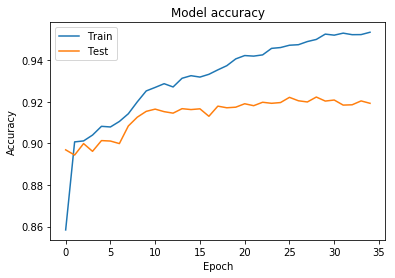

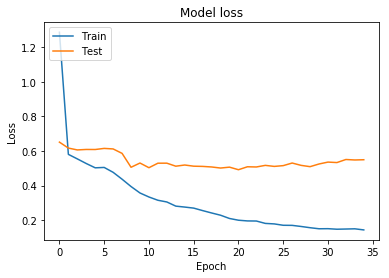

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
# # overfit and evaluate the model 
loss, accuracy = model.evaluate(dataset, batch_size=32, verbose=0)
print('Accuracy: {}'.format(accuracy * 100))


InvalidArgumentError: Incompatible shapes: [15,8] vs. [32,8]
	 [[{{node conv_attention_3/time_distributed_15/while_1/while/add_1}}]]

In [127]:
# tf.keras.models.save_model(
#     model,
#     'test',
#     overwrite=True,
#     include_optimizer=True
# )
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


In [6]:
# translate prediction

from data.utils import translate_tokenized_array_to_list_words, predict_name

# prediction = model.predict(np.expand_dims(code_snippet[8], 0), steps=1)
prediction = model.predict(code_snippet[9:10], steps=1)
print(prediction.argmax(2))
# translate_tokenized_array_to_list_words(vocab, [10])
# predict_name(vocab, model, code_snippet[21].reshape(1, -1))
# translate_tokenized_array_to_list_words(vocab, prediction.argmax(2)[0])
# print(prediction2.argmax(2))
# prediction.argmax(2)
# label_name.shape
# code_snippet.shape



[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
from data.utils import translate_tokenized_array_to_list_words

translate_tokenized_array_to_list_words(vocab, np.asarray([10, 521, 289,  11,   0]))


['rbrace', 'request', 'shards', 'index', 'lbrace', '<s>']

In [35]:
prediction = model.predict(dataset, steps=1)


In [36]:

val, probs = tf.keras.backend.ctc_decode(
    prediction,
    (max_chunk_length, )*batch_size,
    greedy=True,
    beam_width=100,
    top_paths=1
)

tf.Session().run(val)

[array([[ 10, 521, 289,  11,   0]])]

In [24]:
dataset.repeat()

<DatasetV1Adapter shapes: ((1, 50, 1), (1, 50, 1)), types: (tf.int64, tf.int64)>